<a href="https://colab.research.google.com/github/joannakois/Data_Science/blob/master/Summer_olimpic_medals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import pakietów

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from IPython.display import display

# 1. Wczytanie danych

In [2]:
df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", engine='python')

# 2. Wstępna eksploracja danych

In [3]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"K�HLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [4]:
df.shape

(15433, 11)

In [5]:
# Sprawdzenie, czy występują braki danych
df.isna().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

117 wierszy jest pustych

In [6]:
# Usunięcie pustych wierszy
df.dropna(how = 'all', inplace = True)

In [7]:
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [8]:
# Zmiana typu kolumny Year z float na int
df.Year = df.Year.astype('int')

In [42]:
# Dodanie trzech zmiennych 0-1 wskazujących, jaki medal został zdobyty
df['Gold'] = [1 if i == 'Gold' else 0 for i in df['Medal']]
df['Silver'] = [1 if i == 'Silver' else 0 for i in df['Medal']]
df['Bronze'] = [1 if i == 'Bronze' else 0 for i in df['Medal']]

In [9]:
df.describe(include= ['object'])

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15316,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,28,41,293,11337,2,128,127,3,3
top,Beijing,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,2210,1523,817,16,9388,1992,1992,8817,5258


Letnie zawody olimpijskie odbywały się w 9 miastach. Od 1976 do 2008 roku było 28 kategorii sportowych (oraz 41 dyscyplin w ramach kategorii). Zawodnicy pochodzili ze 127 krajów. Najczęsciej letnie zawody olimpijskie odbywały się w Beijing. Najczęściej zdobywał medale PHELPS, Michael, a w przypadku państw mieszkańcy USA.

In [10]:
df.City.unique()


array(['Montreal', 'Moscow', 'Los Angeles', 'Seoul', 'Barcelona',
       'Atlanta', 'Sydney', 'Athens', 'Beijing'], dtype=object)

In [11]:
df.Year.unique()

array([1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008])

Na podstawie tego, że liczba miast oraz lat, w których odbyły się zawody jest taka sama w każdej macierzy i wynosi 9, a także tego, że zawody w 1976 roku odbyły się w Montrealu, można wywnioskować, że lata w powyższej macierzy odpowiadają miastom w drugiej powyższej macierzy.

In [13]:
# Tabela - miasto oraz rok, w którym odbyła się letnia olimpiada
df_City_Year = pd.DataFrame({'City':df.City.unique(), 'Year': df.Year.unique()})
df_City_Year

,City,Year
0,Montreal,1976
1,Moscow,1980
2,Los Angeles,1984
3,Seoul,1988
4,Barcelona,1992
5,Atlanta,1996
6,Sydney,2000
7,Athens,2004
8,Beijing,2008


In [16]:
# Mapa z miastami, w których odbywały się olimpiady letnie

m = folium.Map(location=[20, 0], zoom_start=2.0, width='50%', height='80%')

# Add marker for Montreal
folium.Marker(
    location=[45.508888, -73.561668], # coordinates for the marker
    popup='Montreal - 1976', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Add marker for Moscow
folium.Marker(
    location=[55.751244, 37.618423], # coordinates for the marker
    popup='Moscow - 1980', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Add marker for Los Angeles
folium.Marker(
    location=[34.052235, -118.243683], # coordinates for the marker
    popup='Los Angeles - 1984', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Add marker for Seoul
folium.Marker(
    location=[37.532600, 127.024612], # coordinates for the marker
    popup='Seul - 1988', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Add marker for Barcelona
folium.Marker(
    location=[41.390205, 2.154007], # coordinates for the marker
    popup='Barcelona - 1992', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Add marker for Atlanta
folium.Marker(
    location=[33.753746, -84.386330], # coordinates for the marker
    popup='Atlanta - 1996', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Add marker for Sydney
folium.Marker(
    location=[-33.865143, 151.209900], # coordinates for the marker
    popup='Sydney - 2000', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Add marker for Athens
folium.Marker(
    location=[37.983810, 23.727539], # coordinates for the marker
    popup='Athens - 2004', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Add marker for Beijing
folium.Marker(
    location=[39.916668, 116.383331], # coordinates for the marker
    popup='Beijing - 2008', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Display m
display(m)

# 3. Eksploracja danych - Polska

In [43]:
# Sprawdzenie, które kraje zdobyły najwięcej medali w latach 1976-2008
df_countries = pd.DataFrame(df.groupby('Country').Medal.count())
df_countries.sort_values(by = ['Medal'], ascending = False, inplace = True)
df_countries.reset_index(inplace = True)
df_best_countries = df_countries[:10]
df_best_countries

,Country,Medal
0,United States,1992
1,Soviet Union,1021
2,Australia,798
3,Germany,691
4,China,679
5,Russia,638
6,East Germany,626
7,Italy,486
8,Romania,482
9,United Kingdom,467


In [44]:
# Sprawdzenie, na którym miejscu jest Polska pod względem ilości zdobytych medali
df_countries.loc[df_countries['Country'] == 'Poland']

,Country,Medal
21,Poland,263


Polska jest na 22 miejscu pod względem ilości zdobytych medali.

In [45]:
# Sprawdzenie, jakie kraje są przed i za Polską
df_countries.loc[19:23]

,Country,Medal
19,Canada,304
20,Yugoslavia,278
21,Poland,263
22,Bulgaria,247
23,Unified team,223


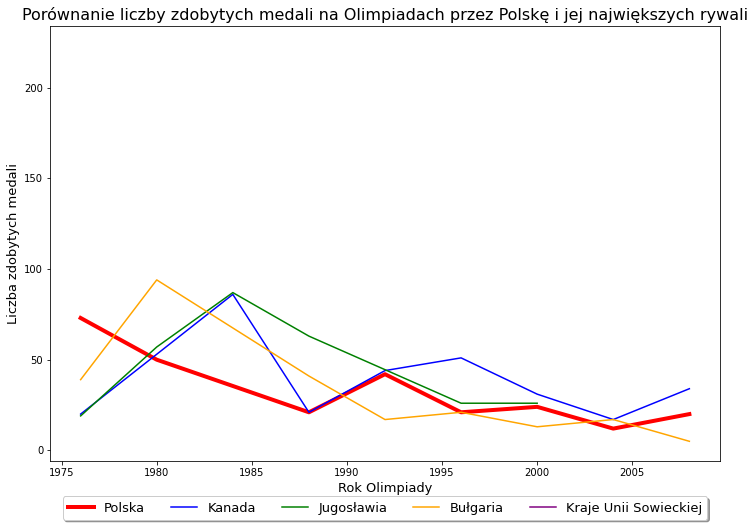

In [46]:
# Porównanie liczby zdobytych medali na Olimpiadach przez Polskę i jej największych rywali

# Utworzenie dataframów dla Polski i krajów o podobnych wynikach do PL pod względem ilości zdobytych medali
df_Poland = df[df['Country'] == 'Poland']
df_Canada = df[df['Country'] == 'Canada']
df_Yugoslavia = df[df['Country'] == 'Yugoslavia']
df_Bulgaria = df[df['Country'] == 'Bulgaria']
df_Unified_team = df[df['Country'] == 'Unified team']

# Policzenie, ile medali zdobyła Polska na poszczególnych olimpiadach
df_Poland_Year = pd.DataFrame(df_Poland.groupby(['Year', 'City']).Medal.count())
df_Poland_Year.sort_values(by=['Year'], inplace = True)
df_Poland_Year.reset_index(inplace = True)
df_Poland_Year

# Policzenie, ile medali zdobyła Kanada na poszczególnych olimpiadach
df_Canada_Year = pd.DataFrame(df_Canada.groupby(['Year', 'City']).Medal.count())
df_Canada_Year.sort_values(by=['Year'], inplace = True)
df_Canada_Year.reset_index(inplace = True)

# Policzenie, ile medali zdobyła Jugosławia na poszczególnych olimpiadach
df_Yugoslavia_Year = pd.DataFrame(df_Yugoslavia.groupby(['Year', 'City']).Medal.count())
df_Yugoslavia_Year.sort_values(by=['Year'], inplace = True)
df_Yugoslavia_Year.reset_index(inplace = True)

# Policzenie, ile medali zdobyła Bułgaria na poszczególnych olimpiadach
df_Bulgaria_Year = pd.DataFrame(df_Bulgaria.groupby(['Year', 'City']).Medal.count())
df_Bulgaria_Year.sort_values(by=['Year'], inplace = True)
df_Bulgaria_Year.reset_index(inplace = True)

# Policzenie, ile medali zdobyły kraje byłej Unii Sowieckiej na poszczególnych olimpiadach
df_Unified_team_Year = pd.DataFrame(df_Unified_team.groupby(['Year', 'City']).Medal.count())
df_Unified_team_Year.sort_values(by=['Year'], inplace = True)
df_Unified_team_Year.reset_index(inplace = True)

# wielkość wykresu
plt.rcParams["figure.figsize"] = (12, 8) 

# wykres
fig, ax = plt.subplots()
ax.plot('Year', 'Medal', data=df_Poland_Year, color = "red", linewidth = 4, label = "Polska")
ax.plot('Year', 'Medal', data=df_Canada_Year, color = "blue", label = "Kanada")
ax.plot('Year', 'Medal', data=df_Yugoslavia_Year, color = "green", label = "Jugosławia")
ax.plot('Year', 'Medal', data=df_Bulgaria_Year, color = "orange", label = "Bułgaria")
ax.plot('Year', 'Medal', data=df_Unified_team_Year, color = "purple", label = "Kraje Unii Sowieckiej")

# Dodanie tytułu wykresu i tytułu osiom
plt.title('Porównanie liczby zdobytych medali na Olimpiadach przez Polskę i jej największych rywali', fontsize = 16)
plt.xlabel("Rok Olimpiady", fontsize = 13)
plt.ylabel("Liczba zdobytych medali", fontsize = 13)

# Dodanie legendy
ax.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), ncol = 6, shadow = True, fontsize = 13)

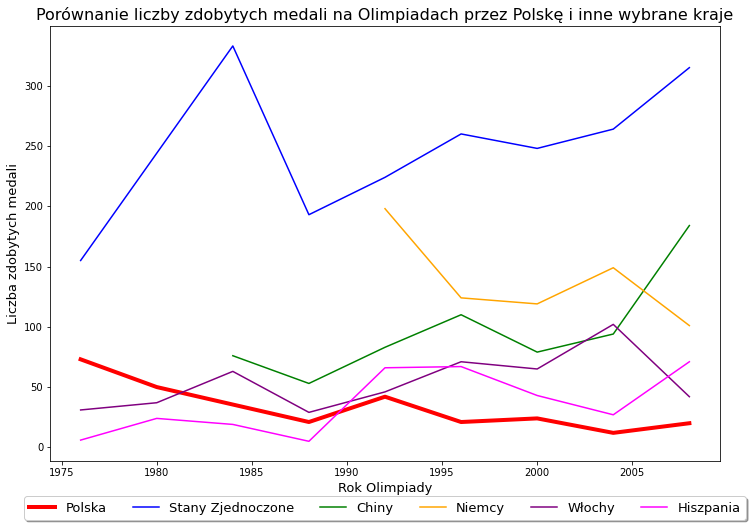

In [47]:
# Porównanie liczby zdobytych medali na Olimpiadach przez Polskę i inne wybrane kraje

# Utworzenie dataframów dla innych wybranych krajów
df_USA = df[df['Country'] == 'United States']
df_China = df[df['Country'] == 'China']
df_Germany = df[df['Country'] == 'Germany']
df_Italy = df[df['Country'] == 'Italy']
df_Spain = df[df['Country'] == 'Spain']

# Policzenie, ile medali zdobyłay Stany Zjednoczone na poszczególnych olimpiadach
df_USA_Year = pd.DataFrame(df_USA.groupby(['Year', 'City']).Medal.count())
df_USA_Year.sort_values(by=['Year'], inplace = True)
df_USA_Year.reset_index(inplace = True)

# Policzenie, ile medali zdobyły Chiny na poszczególnych olimpiadach
df_China_Year = pd.DataFrame(df_China.groupby(['Year', 'City']).Medal.count())
df_China_Year.sort_values(by=['Year'], inplace = True)
df_China_Year.reset_index(inplace = True)

# Policzenie, ile medali zdobyły Niemcy na poszczególnych olimpiadach
df_Germany_Year = pd.DataFrame(df_Germany.groupby(['Year', 'City']).Medal.count())
df_Germany_Year.sort_values(by=['Year'], inplace = True)
df_Germany_Year.reset_index(inplace = True)

# Policzenie, ile medali zdobyły Włochy na poszczególnych olimpiadach
df_Italy_Year = pd.DataFrame(df_Italy.groupby(['Year', 'City']).Medal.count())
df_Italy_Year.sort_values(by=['Year'], inplace = True)
df_Italy_Year.reset_index(inplace = True)

# Policzenie, ile medali zdobyła Hiszpania na poszczególnych olimpiadach
df_Spain_Year = pd.DataFrame(df_Spain.groupby(['Year', 'City']).Medal.count())
df_Spain_Year.sort_values(by=['Year'], inplace = True)
df_Spain_Year.reset_index(inplace = True)

# wielkość wykresu
plt.rcParams["figure.figsize"] = (12, 8) 

# wykres
fig, ax = plt.subplots()
ax.plot('Year', 'Medal', data=df_Poland_Year, color = "red", linewidth = 4, label = "Polska")
ax.plot('Year', 'Medal', data=df_USA_Year, color = "blue", label = "Stany Zjednoczone")
ax.plot('Year', 'Medal', data=df_China_Year, color = "green", label = "Chiny")
ax.plot('Year', 'Medal', data=df_Germany_Year, color = "orange", label = "Niemcy")
ax.plot('Year', 'Medal', data=df_Italy_Year, color = "purple", label = "Włochy")
ax.plot('Year', 'Medal', data=df_Spain_Year, color = "magenta", label = "Hiszpania")

# Dodanie tytułu wykresu i tytułu osiom
plt.title('Porównanie liczby zdobytych medali na Olimpiadach przez Polskę i inne wybrane kraje', fontsize = 16)
plt.xlabel("Rok Olimpiady", fontsize = 13)
plt.ylabel("Liczba zdobytych medali", fontsize = 13)

# Dodanie legendy
ax.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), ncol = 6, shadow = True, fontsize = 13)

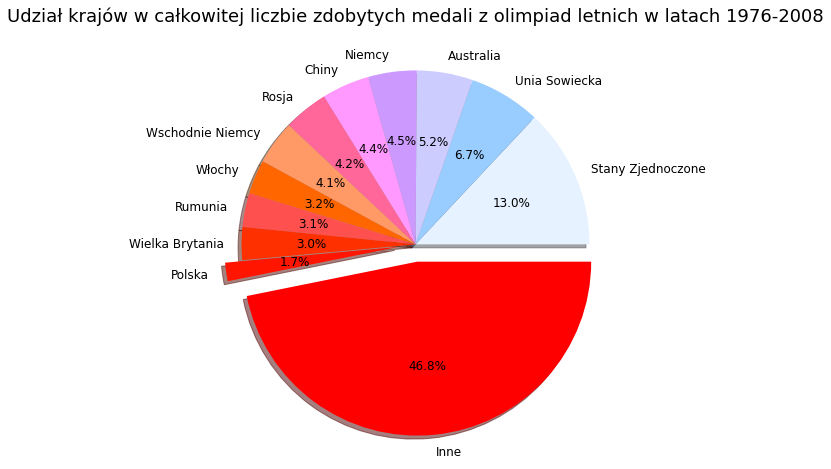

In [48]:
# Udział krajów w całkowitej liczbie zdobytych medali z olimpiad letnich w latach 1976-2008

# Dodanie wiersza z liczbą medali zdobytych przez PL
df_Poland_Medals = df_countries.loc[df_countries['Country'] == 'Poland', 'Medal']
df_best_countries = df_best_countries.append({'Country':'Polska', 'Medal': df_Poland_Medals}, ignore_index=True)

# Dodanie wiersza z liczbą pozostałych medali zbotych przez kraje poza TOP 10
Medals_all = df.Medal.count() # całkowita liczba zdobytych medali
Medals_TOP_10 = df_best_countries['Medal'].sum() # liczba medali zdobytych przez kraje z TOP 10
Medals_other = Medals_all - Medals_TOP_10 # liczba medali zdobyta przez pozostałe kraje (poza TOP 10)
df_best_countries = df_best_countries.append({'Country':'Other', 'Medal':Medals_other}, ignore_index=True)

colors = ['#e6f2ff', '#99ccff', '#ccccff', '#cc99ff', '#ff99ff', '#ff6699', '#ff9966', '#ff6600', '#ff5050', '#ff3000', '#ff1500', '#ff0000']
labels = ['Stany Zjednoczone', 'Unia Sowiecka', 'Australia', 'Niemcy', 'Chiny', 'Rosja', 'Wschodnie Niemcy', 'Włochy', 'Rumunia', 'Wielka Brytania', 'Polska', 'Inne']
           
# Wykres kołowy
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1)
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(df_best_countries['Medal'], labels= labels, autopct='%1.1f%%', 
        shadow=True, explode = explode, colors = colors)

# Zmiana wielkości czcionek
plt.setp(autotexts, size=12)
plt.setp(texts, size=12)

# Tytuł
plt.title("Udział krajów w całkowitej liczbie zdobytych medali z olimpiad letnich w latach 1976-2008", size = 18)

plt.show()

Text(0, 0.5, 'Liczba zdobytych medali')

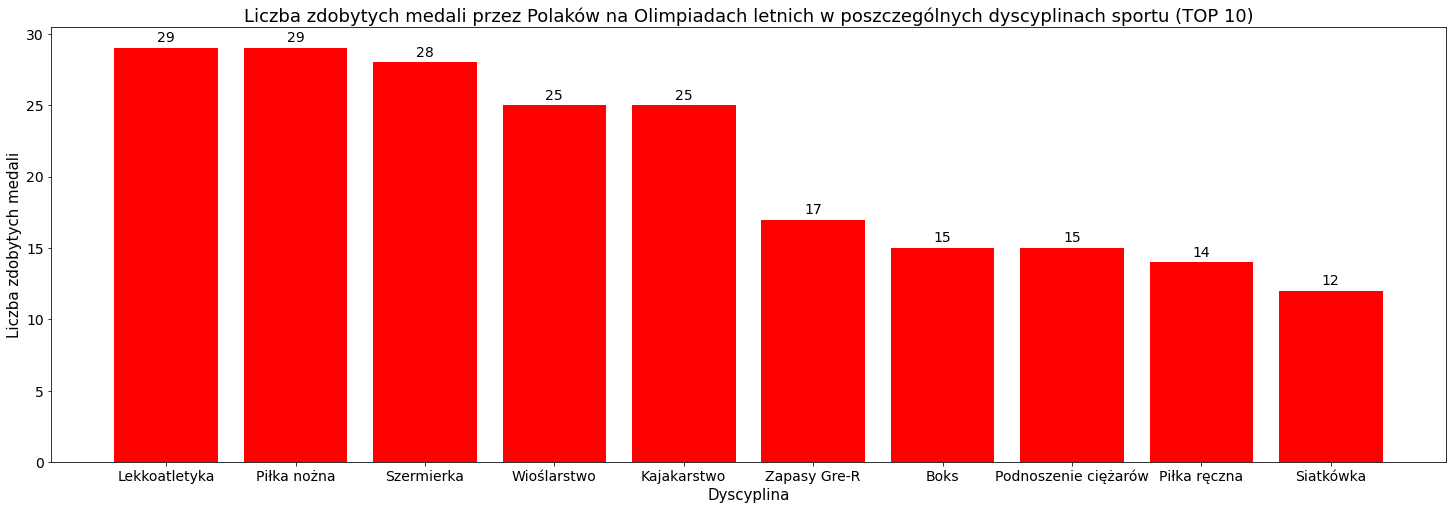

In [49]:
# Top 10 dyscyplin sportowych, w których Polacy zdobyli najwięcej medali

# Policzenie, ile medali zdobyli Polacy w poszczególnych dyscyplinach sportowych
df_Poland_Sport_Discipline = pd.DataFrame(df_Poland.groupby(['Discipline', 'Sport']).Medal.count())
df_Poland_Sport_Discipline.sort_values(by=['Medal'], ascending = False, inplace = True)

# wielkość wykresu
plt.rcParams["figure.figsize"] = (25, 8) 

# Wykres
x = np.arange(10)
fig, ax = plt.subplots()
barplot = ax.bar(x, 'Medal', data = df_Poland_Sport_Discipline[:10], color = 'red')
xlabels = ('Lekkoatletyka', 'Piłka nożna', 'Szermierka', 'Wioślarstwo', 'Kajakarstwo', 'Zapasy Gre-R', 'Boks', 'Podnoszenie ciężarów', 'Piłka ręczna', 'Siatkówka')
plt.xticks(x, xlabels) # oznaczenia osi x
ax.tick_params(axis='both', which='major', labelsize=14) # zmiana wielkości czcionki skali na obu osiach

# Dodanie liczby zdobytych medali dla każdego słupka
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 14)
autolabel(barplot)

# Dodanie tytułu wykresu i tytułu osiom
plt.title('Liczba zdobytych medali przez Polaków na Olimpiadach letnich w poszczególnych dyscyplinach sportu (TOP 10)', fontsize = 18)
plt.xlabel("Dyscyplina", fontsize = 15)
plt.ylabel("Liczba zdobytych medali", fontsize = 15)

Zobaczmy, jak Polacy wypadali na poszczególnych Olimpiadach.

In [50]:
# Liczba poszczególnych medali zdobyta przez Polaków w kolejnych Olimpiadach
df_Poland_Medals = df_Poland[['Year', 'City', 'Gold', 'Silver', 'Bronze']]
df_Poland_Year_type = pd.DataFrame(df_Poland_Medals.groupby(['Year', 'City']).sum())
df_Poland_Year_type.sort_values(by=['Year'], inplace = True)
df_Poland_Year_type.reset_index(inplace = True)
df_Poland_Year_type

# Liczba poszczególnych medali i medali łącznie zdobyta przez Polaków w kolejnych Olimpiadach
df_Poland_Medals_final = pd.merge(df_Poland_Year_type, df_Poland_Year)
df_Poland_Medals_final

,Year,City,Gold,Silver,Bronze,Medal
0,1976,Montreal,18,29,26,73
1,1980,Moscow,3,25,22,50
2,1988,Seoul,2,9,10,21
3,1992,Barcelona,5,18,19,42
4,1996,Atlanta,7,7,7,21
5,2000,Sydney,7,10,7,24
6,2004,Athens,4,2,6,12
7,2008,Beijing,6,13,1,20


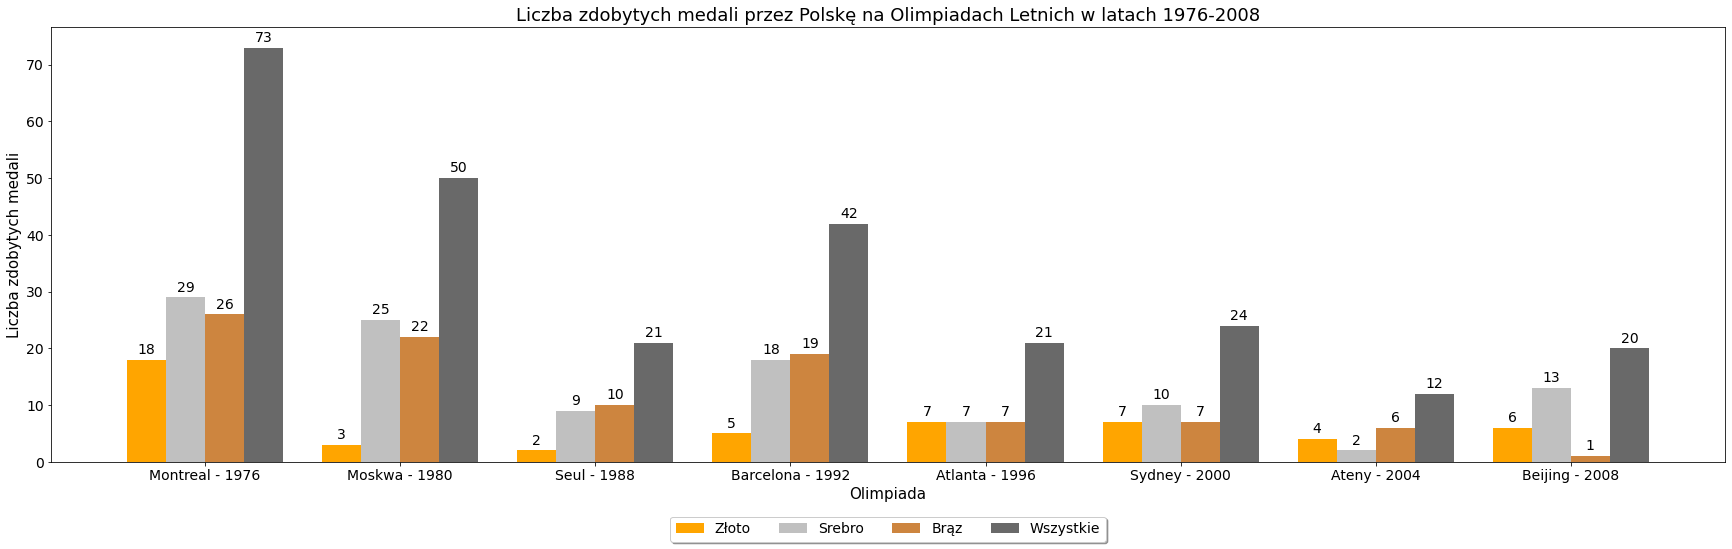

In [52]:
# Liczba zdobytych medali przez Polskę na Olimpiadach Letnich w latach 1976-2008

# Wielkość wykresu
plt.rcParams["figure.figsize"] = (30, 8)

# Wykres
ind = np.arange(len(df_Poland_Medals_final))  # the x locations for the groups
width = 0.20  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind - 1.5*width, df_Poland_Medals_final['Gold'], width,
                color='Orange', label='Złoto')
rects2 = ax.bar(ind - 0.5*width, df_Poland_Medals_final['Silver'], width,
                color='Silver', label='Srebro')
rects3 = ax.bar(ind + 0.5*width, df_Poland_Medals_final['Bronze'], width,
                color='Peru', label='Brąz')
rects4 = ax.bar(ind + 1.5*width, df_Poland_Medals_final['Medal'], width,
                color='dimgray', label='Wszystkie')

# Dodanie liczby zdobytych medali dla każdego słupka
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 14)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Oznaczenia osi x
x = np.arange(8)
xlabels = ('Montreal - 1976', 'Moskwa - 1980', 'Seul - 1988', 'Barcelona - 1992', 'Atlanta - 1996', 'Sydney - 2000', 'Ateny - 2004', 'Beijing - 2008')
plt.xticks(x, xlabels)

# Wielkość czcionki dla skali na obu osiach
ax.tick_params(axis='both', which='major', labelsize=14)

# Dodanie tytułu wykresu i tytułu osiom
plt.title('Liczba zdobytych medali przez Polskę na Olimpiadach Letnich w latach 1976-2008', fontsize = 18)
plt.xlabel("Olimpiada", fontsize = 15)
plt.ylabel("Liczba zdobytych medali", fontsize = 15)

# Dodanie legendy
ax.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.2), ncol = 8, shadow = True, fontsize = 14)

Polacy nie brali udział w Olimpiadzie w 1984 roku w Los Angeles (stąd brak medali w tym roku).

Zobaczmy teraz, kto z Polaków zdobył najwięcej medali.

In [16]:
# TOP 5 najlepszych Polaków pod względem ilości zdobytych medali
df_Poland_Athlete =  pd.DataFrame(df_Poland.groupby(['Athlete']).Medal.count())
df_Poland_Athlete.sort_values(by=['Medal'], ascending = False, inplace = True)
df_Poland_Athlete.reset_index(inplace = True)
df_Poland_Athlete = df_Poland_Athlete.rename({'Medal': 'Medal_count'}, axis = 'columns')
df_Poland_Athlete[:5]

,Athlete,Medal_count
0,"KORZENIOWSKI, Robert",4
1,"TRACZ, Jozef",3
2,"MAUER, Renata",3
3,"JEDRZEJCZAK, Otylia",3
4,"KOWALCZYK, Jan",2


Przyjrzyjmy się bliżej tym sportowcom.

In [17]:
# TOP 5 sportowców - analiza danych
df_Poland_Masters = df_Poland.loc[df_Poland['Athlete'].isin(['KORZENIOWSKI, Robert', 'TRACZ, Jozef', 'MAUER, Renata', 'JEDRZEJCZAK, Otylia', 'KOWALCZYK, Jan']), \
              ['Athlete', 'Sport', 'Discipline', 'Event', 'Medal', 'City', 'Year']]
df_Poland_Masters.sort_values(by = ['Athlete'], inplace = True)
pd.merge(df_Poland_Athlete, df_Poland_Masters, on = 'Athlete')

,Athlete,Medal_count,Sport,Discipline,Event,Medal,City,Year
0,"KORZENIOWSKI, Robert",4,Athletics,Athletics,50km walk,Gold,Atlanta,1996
1,"KORZENIOWSKI, Robert",4,Athletics,Athletics,20km walk,Gold,Sydney,2000
2,"KORZENIOWSKI, Robert",4,Athletics,Athletics,50km walk,Gold,Sydney,2000
3,"KORZENIOWSKI, Robert",4,Athletics,Athletics,50km walk,Gold,Athens,2004
4,"TRACZ, Jozef",3,Wrestling,Wrestling Gre-R,68 - 74kg (welterweight),Bronze,Seoul,1988
5,"TRACZ, Jozef",3,Wrestling,Wrestling Gre-R,68 - 74kg (welterweight),Silver,Barcelona,1992
6,"TRACZ, Jozef",3,Wrestling,Wrestling Gre-R,68 - 74kg (welterweight),Bronze,Atlanta,1996
7,"MAUER, Renata",3,Shooting,Shooting,50m rifle 3 positions (3x20 shots),Bronze,Atlanta,1996
8,"MAUER, Renata",3,Shooting,Shooting,10m air rifle (40 shots),Gold,Atlanta,1996
9,"MAUER, Renata",3,Shooting,Shooting,50m rifle 3 positions (3x20 shots),Gold,Sydney,2000


Najwięcej medali zdobył **Robert Korzeniowski** (4 medale, w tym wszystkie złote!). Robert Korzeniowski zdobył 3 złote medale w chodzie na 50 km i jeden złoty medal w chodzie na 20 km. Dwa złote medale przywiózł z Olimpiady w Sydney w 2000 roku (chód na 20 km i chód na 50 km).

3 medale zdobył **Józef Tracz** w zapasach w wadze półśredniej. Zdobył on jeden srebrny medal w Barcelonie w 1992 roku i dwa brązowe medale w Seulu w 1988 roku i w Atlancie w 1996 roku.

Również trzy medale zdobyła **Renata Mauer** w strzelaniu. Przywiozła ona złoty i brązowy medal z olimpiady w Atlancie w 1996 roku i jeden złoty z olimpiady w Sydney w 2000 roku.

Polska pływaczka, **Otylia Jędrzejczak**, również poszczyciła się trzema złotymi medalami. Wszystkie przywiozła z olimpiady w Atenach w 2004 roku. Przywiozła 1 złoty medal za 200 metrów stylem motylkowym i dwa srebrne medale za 400 metrów stylem dowolnym i 100 metrów stylem motylkowym.

Ostatnim sportowcem z polskiego TOP 5 jest **Jan Kowalczyk**, który zdobył dwa medale w skokach przez przeszkody. Przywiózł dwa medale z olimpiady w Moskwie w 1980 roku. Złoty medal zdobył sam, a srebrny w zespole.